In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn import linear_model, preprocessing 
import warnings

In [2]:
goals = pd.read_csv('/Users/danielle.arneson/Desktop/goals.csv')

/Users/danielle.arneson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991188 entries, 0 to 1991187
Data columns (total 14 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   total_engagement__c              float64
 1   total_received_engagements__c    float64
 2   created_date__c                  object 
 3   external_participant_id__c       object 
 4   x6_week_engagement_modality__c   object 
 5   x6_week_engagement_goal_type__c  object 
 6   program__c                       object 
 7   program_name__c                  object 
 8   limeade_participant_code__c      object 
 9   overall_goal_status__c           object 
 10  discontinued_coaching__c         object 
 11  last_engagement_activity__c      object 
 12  createddate                      object 
 13  goal_completed__c                object 
dtypes: float64(2), object(12)
memory usage: 212.7+ MB


In [4]:
#df clean up
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.lower()
goals['discontinued_coaching__c'] = goals['discontinued_coaching__c'].str.lower()
goals['program_name__c'] = goals['program_name__c'].str.lower()
goals['x6_week_engagement_goal_type__c'] = goals['x6_week_engagement_goal_type__c'].str.lower()
goals['overall_goal_status__c'] = goals['overall_goal_status__c'].str.lower()
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace("(", "_")
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace("-", "_")
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace(")", "")
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace(" ", "_")
goals['overall_goal_status__c'] = goals['overall_goal_status__c'].str.replace(" ", "_")
goals['program_name__c'] = goals['program_name__c'].str.replace(" ", "_")
goals['discontinued_coaching__c'] = goals['discontinued_coaching__c'].str.replace(" ", "_")
goals.head()

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,group_coaching__webinar_series,truth,a0q39000009MY1bAAG,practice_simple_gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,complete,NaN,2019-04-13 00:00:00,2019-03-03 06:23:35,NaN
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,group_coaching__webinar_series,truth,a0q39000009MUVjAAO,change_your_habits,2faff361-5498-47bc-859b-569acf2f34f0,dismissed,NaN,2019-03-16 00:00:00,2019-03-03 06:38:54,NaN
2,0.0,0.0,2019-03-08 00:00:00,b615b944-9a60-42db-a3b3-01c1e625ceeb,group_coaching__webinar_series,truth,a0q39000008dC8QAAU,change_your_habits,b615b944-9a60-42db-a3b3-01c1e625ceeb,no_action,NaN,NaN,2019-03-03 06:50:47,NaN
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,group_coaching__webinar_series,stress,a0q39000008dC8QAAU,live_empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,complete,NaN,2019-04-11 00:00:00,2019-03-03 08:04:11,NaN
4,0.0,0.0,2019-03-05 00:00:00,9d359efc-f3aa-44a5-a857-26baa2588385,group_coaching__webinar_series,financial,a0q39000008dCNoAAM,budget_basics,9d359efc-f3aa-44a5-a857-26baa2588385,no_action,NaN,NaN,2019-03-03 12:23:30,NaN


In [5]:
goals['x6_week_engagement_modality__c'].unique()

array(['group_coaching__webinar_series', 'self_guided',
       'group_coaching__one_time_event', 'digital___amp',
       'one_on_one__onsite', 'one_on_one', 'group_coaching__onsite',
       'one_on_one__1x_event', 'one_on_one__telephonic', 'digital___awp',
       'recorded_session', 'one_on_one__video_coaching', nan,
       'biometric_event_teachable_moment__1x_event', 'ras',
       'group_coaching__onsite_series', 'one_on_one_pgi',
       'digital___ember', 'one_time_company_event'], dtype=object)

In [6]:
goals=goals.replace(to_replace =['recorded_session'],  
                            value ='group_coaching__webinar_series')
goals=goals.replace(to_replace =["one_on_one__telephonic"],  
                            value ="one_on_one")

In [7]:
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_on_one__video_coaching'].index) 
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_on_one__1x_event'].index) 
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'biometric_event_teachable_moment__1x_event'].index) 
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_time_company_event'].index)
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_on_one_pgi'].index)
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'group_coaching__one_time_event'].index)
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'group_coaching__onsite_series'].index)

In [8]:
goals['x6_week_engagement_modality__c'].unique()

array(['group_coaching__webinar_series', 'self_guided', 'digital___amp',
       'one_on_one__onsite', 'one_on_one', 'group_coaching__onsite',
       'digital___awp', nan, 'ras', 'digital___ember'], dtype=object)

In [9]:
goals = goals[goals['x6_week_engagement_modality__c'].notna()]

In [10]:
goals['discontinued_coaching__c'] = goals['discontinued_coaching__c'].fillna(0)

In [11]:
goals['discontinued_coaching__c'].unique()

array([0, 'coaching_needs_met', 'general_program_questions',
       'not_interested', 'prefers_webinars', 'end_of_program',
       'unresponsive', 'not_with_company'], dtype=object)

In [12]:
goals['goal_completed__c'] = goals['goal_completed__c'].fillna(0)

In [13]:
goals['last_engagement_activity__c'] = goals['last_engagement_activity__c'].fillna(0)

In [14]:
goals['createddate']=pd.to_datetime(goals['createddate'])

In [15]:
goals = goals[goals['createddate'] > '2017-01-01 12:00:00']

In [16]:
goals.head(50)

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,group_coaching__webinar_series,truth,a0q39000009MY1bAAG,practice_simple_gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,complete,0,2019-04-13 00:00:00,2019-03-03 06:23:35,0
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,group_coaching__webinar_series,truth,a0q39000009MUVjAAO,change_your_habits,2faff361-5498-47bc-859b-569acf2f34f0,dismissed,0,2019-03-16 00:00:00,2019-03-03 06:38:54,0
2,0.0,0.0,2019-03-08 00:00:00,b615b944-9a60-42db-a3b3-01c1e625ceeb,group_coaching__webinar_series,truth,a0q39000008dC8QAAU,change_your_habits,b615b944-9a60-42db-a3b3-01c1e625ceeb,no_action,0,0,2019-03-03 06:50:47,0
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,group_coaching__webinar_series,stress,a0q39000008dC8QAAU,live_empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,complete,0,2019-04-11 00:00:00,2019-03-03 08:04:11,0
4,0.0,0.0,2019-03-05 00:00:00,9d359efc-f3aa-44a5-a857-26baa2588385,group_coaching__webinar_series,financial,a0q39000008dCNoAAM,budget_basics,9d359efc-f3aa-44a5-a857-26baa2588385,no_action,0,0,2019-03-03 12:23:30,0
5,6.0,6.0,2019-03-08 00:00:00,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,group_coaching__webinar_series,financial,a0q39000009MVgYAAW,dream_big,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,complete,0,2019-04-16 00:00:00,2019-03-03 13:30:41,0
6,6.0,6.0,2019-03-08 00:00:00,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,group_coaching__webinar_series,truth,a0q39000009MVgYAAW,change_your_habits,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,complete,0,2019-04-16 00:00:00,2019-03-03 13:35:02,0
7,1.0,1.0,2019-03-03 00:00:00,fc5b4405-baca-47aa-bc12-bf37de8ba412,self_guided,roadmap to success,a0q39000008dC3wAAE,roadmap_to_success,fc5b4405-baca-47aa-bc12-bf37de8ba412,complete,0,0,2019-03-03 13:38:06,0
8,2.0,2.0,2019-03-04 00:00:00,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,group_coaching__webinar_series,truth,a0q39000008dCtfAAE,be_a_change_maker,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,dismissed,0,2019-03-11 00:00:00,2019-03-03 14:01:52,0
9,2.0,2.0,2019-03-07 00:00:00,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,group_coaching__webinar_series,truth,a0q39000008dCtfAAE,making_a_difference,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,dismissed,0,2019-03-14 00:00:00,2019-03-03 14:02:47,0


In [17]:
goals['x6_week_engagement_modality__c'].describe()

count                            1783475
unique                                 8
top       group_coaching__webinar_series
freq                             1533201
Name: x6_week_engagement_modality__c, dtype: object

In [18]:
goals['overall_goal_status__c'].describe()

count      1783475
unique           7
top       complete
freq        724448
Name: overall_goal_status__c, dtype: object

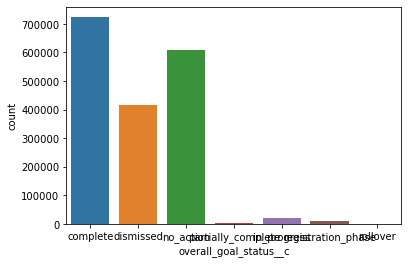

In [19]:
sns.countplot(x="overall_goal_status__c", data=goals)

In [20]:
status = goals.groupby(['x6_week_engagement_modality__c','overall_goal_status__c']).size().reset_index(name='counts')
print(status)

    x6_week_engagement_modality__c overall_goal_status__c  counts
0                    digital___amp               complete    7887
1                    digital___amp              dismissed   29850
2                    digital___amp            in_progress     452
3                    digital___amp              no_action      14
4                    digital___amp     partially_complete     385
5                    digital___amp               rollover     403
6                    digital___awp               complete     370
7                    digital___awp              dismissed     994
8                    digital___awp               rollover       1
9                  digital___ember               complete     216
10                 digital___ember              dismissed     720
11          group_coaching__onsite               complete     942
12          group_coaching__onsite              dismissed     740
13          group_coaching__onsite            in_progress       6
14        

In [21]:
status.loc['Total'] = pd.Series(status['counts'].sum(), index = ['counts'])
print (status)

       x6_week_engagement_modality__c overall_goal_status__c     counts
0                       digital___amp               complete     7887.0
1                       digital___amp              dismissed    29850.0
2                       digital___amp            in_progress      452.0
3                       digital___amp              no_action       14.0
4                       digital___amp     partially_complete      385.0
5                       digital___amp               rollover      403.0
6                       digital___awp               complete      370.0
7                       digital___awp              dismissed      994.0
8                       digital___awp               rollover        1.0
9                     digital___ember               complete      216.0
10                    digital___ember              dismissed      720.0
11             group_coaching__onsite               complete      942.0
12             group_coaching__onsite              dismissed    

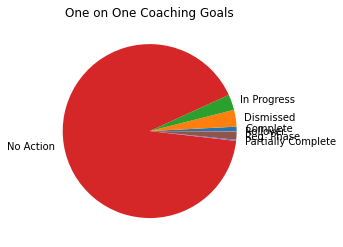

In [22]:
data = [5351,20545,19138,602452,1433,10102,402]
series = pd.Series(data, index=("Complete", "Dismissed", "In Progress", "No Action", "Partially Complete", "Reg. Phase", "Rollover"));

 

# Create a pie chart

series.plot.pie(label="", title="One on One Coaching Goals");

 

plt.show(block=True);

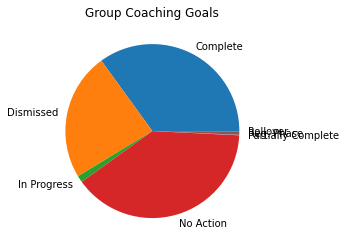

In [23]:
data2 = [536398,363276,19138,602452,1433,10102,402]
series = pd.Series(data2, index=("Complete", "Dismissed", "In Progress", "No Action", "Partially Complete", "Reg. Phase", "Rollover"));

 

# Create a pie chart

series.plot.pie(label="", title="Group Coaching Goals");

 

plt.show(block=True);

In [24]:
list(status.columns.values)

['x6_week_engagement_modality__c', 'overall_goal_status__c', 'counts']

In [25]:
Total = status['counts'].sum()

In [26]:
status['percent'] = (status['counts'] / Total.sum() * 100)
status

,x6_week_engagement_modality__c,overall_goal_status__c,counts,percent
0,digital___amp,complete,7887.0,0.221113
1,digital___amp,dismissed,29850.0,0.836849
2,digital___amp,in_progress,452.0,0.012672
3,digital___amp,no_action,14.0,0.000392
4,digital___amp,partially_complete,385.0,0.010794
5,digital___amp,rollover,403.0,0.011298
6,digital___awp,complete,370.0,0.010373
7,digital___awp,dismissed,994.0,0.027867
8,digital___awp,rollover,1.0,0.000028
9,digital___ember,complete,216.0,0.006056


In [27]:
status= status.groupby('overall_goal_status__c')
status

overall_goal_status__c
complete              AxesSubplot(0.125,0.125;0.775x0.755)
dismissed             AxesSubplot(0.125,0.125;0.775x0.755)
in_progress           AxesSubplot(0.125,0.125;0.775x0.755)
no_action             AxesSubplot(0.125,0.125;0.775x0.755)
partially_complete    AxesSubplot(0.125,0.125;0.775x0.755)
registration_phase    AxesSubplot(0.125,0.125;0.775x0.755)
rollover              AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

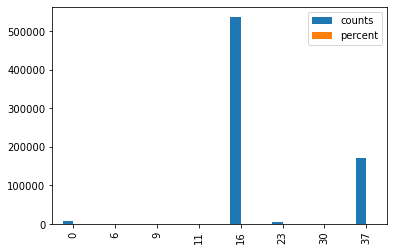

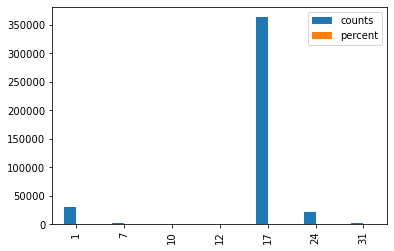

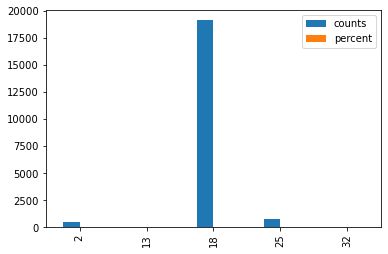

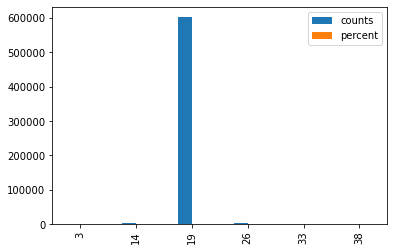

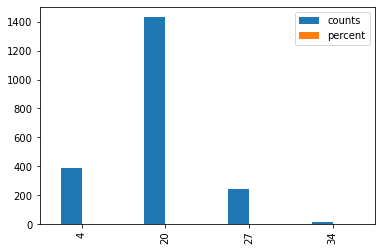

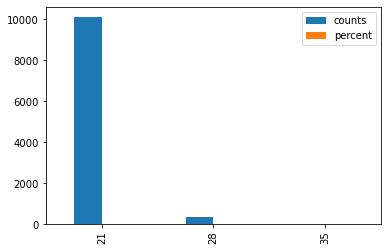

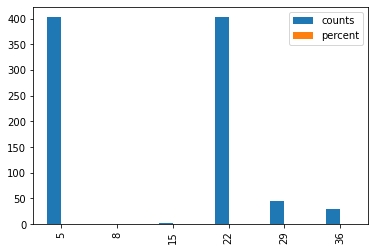

In [30]:
status.plot.bar()

In [31]:
modality =goals.groupby(['x6_week_engagement_modality__c','overall_goal_status__c']).count()
modality.head(50)

total_engagement__c  \
x6_week_engagement_modality__c overall_goal_status__c                        
digital___amp                  complete                               7887   
                               dismissed                             29850   
                               in_progress                             452   
                               no_action                                14   
                               partially_complete                      385   
                               rollover                                403   
digital___awp                  complete                                370   
                               dismissed                               994   
                               rollover                                  1   
digital___ember                complete                                216   
                               dismissed                               720   
group_coaching__onsite         complete                                942   
                               dismissed                               740   
                               in_progress                               6   
                               no_action                              2126   
                               rollover                                  3   
group_coaching__webinar_series complete                             536398   
                               dismissed                            363276   
                               in_progress                           19138   
                               no_action                            602452   
                               partially_complete                     1433   
                               registration_phase                    10102   
                               rollover                                402   
one_on_one                     complete                               5351   
                               dismissed                             20545   
                               in_progress                             714   
                               no_action                              2787   
                               partially_complete                      244   
                               registration_phase                      338   
                               rollover                                 44   
one_on_one__onsite             complete                                987   
                               dismissed                              1641   
                               in_progress                              34   
                               no_action                               127   
                               partially_complete                       15   
                               registration_phase                       10   
                               rollover                                 30   
self_guided                    complete                             172297   
                               no_action                                 1   

                                                       total_received_engagements__c  \
x6_week_engagement_modality__c overall_goal_status__c                                  
digital___amp                  complete                                         7887   
                               dismissed                                       29850   
                               in_progress                                       452   
                               no_action                                          14   
                               partially_complete                                385   
                               rollover                                          403   
digital___awp                  complete                                          370   
                               dismissed                        

In [32]:
complete = goals[['x6_week_engagement_modality__c','overall_goal_status__c']].copy()
complete

,x6_week_engagement_modality__c,overall_goal_status__c
0,group_coaching__webinar_series,complete
1,group_coaching__webinar_series,dismissed
2,group_coaching__webinar_series,no_action
3,group_coaching__webinar_series,complete
4,group_coaching__webinar_series,no_action
...,...,...
1967646,digital___amp,in_progress
1967647,digital___amp,in_progress
1967648,group_coaching__webinar_series,registration_phase
1967649,one_on_one,registration_phase


In [33]:
complete = complete.groupby('overall_goal_status__c').count()
complete

,x6_week_engagement_modality__c
overall_goal_status__c,
complete,724448
dismissed,417766
in_progress,20344
no_action,607507
partially_complete,2077
registration_phase,10450
rollover,883


In [34]:
complete.reset_index(inplace=True)
complete.head()

,overall_goal_status__c,x6_week_engagement_modality__c
0,complete,724448
1,dismissed,417766
2,in_progress,20344
3,no_action,607507
4,partially_complete,2077


In [35]:
complete.columns

Index(['overall_goal_status__c', 'x6_week_engagement_modality__c'], dtype='object')

In [36]:
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('complete', '1')
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('dismissed', '2')
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('in_progress', '3')
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('no_action', '4')
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('partially', '5')
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('_', '')
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('registrationphase', '6')
complete['overall_goal_status__c'] = complete['overall_goal_status__c'].str.replace('rollover', '7')

In [ ]:
complete2 = pd.get_dummies(complete['overall_goal_status__c'])

In [ ]:
complete2.columns

In [38]:
complete.head(7)

,overall_goal_status__c,x6_week_engagement_modality__c
0,1,724448
1,2,417766
2,3,20344
3,4,607507
4,51,2077
5,6,10450
6,7,883


In [ ]:
complete = pd.concat([complete, complete2], axis=1)
complete.head()

In [39]:
X= complete[['overall_goal_status__c']]
y= complete[['x6_week_engagement_modality__c']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(2, 1) (2, 1)
(5, 1) (5, 1)


In [41]:
model = linear_model.LinearRegression(normalize=True)

In [42]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [43]:
print(model.score(X_train, y_train))

1.0


In [45]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'predictions vs. actual')

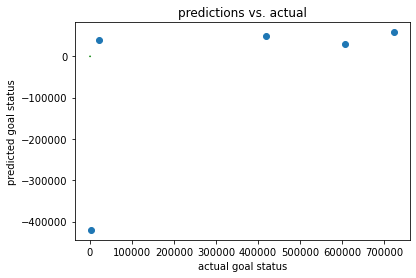

In [46]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.xlabel('actual goal status')
plt.ylabel('predicted goal status')
plt.title("predictions vs. actual")

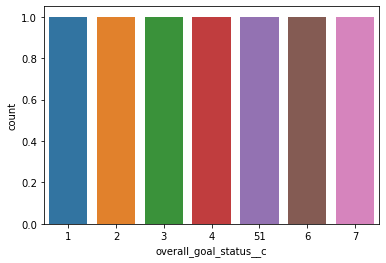

In [47]:
sns.countplot(x="overall_goal_status__c", data=complete)

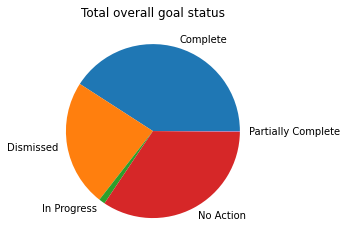

In [48]:
data3 = [724448,417766,20344,607507,2077]
series = pd.Series(data3, index=("Complete", "Dismissed", "In Progress", "No Action", "Partially Complete"));

 

# Create a pie chart

series.plot.pie(label="", title="Total overall goal status");

 

plt.show(block=True);

In [49]:
goals[['last_engagement_activity__c', 'createddate']].describe()

,last_engagement_activity__c,createddate
count,1783475.0,1783475
unique,1493.0,1746566
top,0.0,2018-01-29 17:35:11
freq,791253.0,5
first,NaN,2017-01-01 12:42:16
last,NaN,2021-02-02 04:24:12


In [50]:
goals['last_engagement_activity__c'] = pd.to_datetime(goals['last_engagement_activity__c'])

In [51]:
activity = goals[(goals.overall_goal_status__c != 'no_action') & (goals.overall_goal_status__c != 'registration_phase')]
activity.head()

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,group_coaching__webinar_series,truth,a0q39000009MY1bAAG,practice_simple_gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,complete,0,2019-04-13,2019-03-03 06:23:35,0
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,group_coaching__webinar_series,truth,a0q39000009MUVjAAO,change_your_habits,2faff361-5498-47bc-859b-569acf2f34f0,dismissed,0,2019-03-16,2019-03-03 06:38:54,0
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,group_coaching__webinar_series,stress,a0q39000008dC8QAAU,live_empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,complete,0,2019-04-11,2019-03-03 08:04:11,0
5,6.0,6.0,2019-03-08 00:00:00,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,group_coaching__webinar_series,financial,a0q39000009MVgYAAW,dream_big,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,complete,0,2019-04-16,2019-03-03 13:30:41,0
6,6.0,6.0,2019-03-08 00:00:00,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,group_coaching__webinar_series,truth,a0q39000009MVgYAAW,change_your_habits,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,complete,0,2019-04-16,2019-03-03 13:35:02,0


In [52]:
activity = activity['completion_time'] = activity['last_engagement_activity__c'] - activity['createddate']

In [53]:
activity.head()

0    40 days 17:36:25
1    12 days 17:21:06
3    38 days 15:55:49
5    43 days 10:29:19
6    43 days 10:24:58
dtype: object